<a href="https://colab.research.google.com/github/esa-prakasa/autov/blob/master/BinaryLaneDetectionFz3x3resize20pct_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load dan mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/dataset/csvtrain/"
#!ls -l "/content/drive/My Drive/Colab Notebooks/dataset"

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv(path+"train200_20pct.csv")
dataset.head(10)


,0,1,1.1,14,12,8,9,9.1,10,8.1,10.1,9.2,14.1,13,9.3,9.4,9.5,12.1,9.6,11,11.1,12.2,13.1,10.2,11.2,11.3,10.3,9.7,11.4,10.4,0.1
0,0,1,2,12,8,9,9,9,9,10,9,8,13,9,9,10,9,9,11,11,9,13,10,10,12,11,11,11,10,10,0
1,0,1,3,8,9,10,12,9,9,9,8,11,9,9,10,11,10,9,11,9,10,10,10,11,12,12,11,10,10,8,0
2,0,1,4,9,10,10,12,12,9,8,11,10,9,10,14,15,11,10,9,10,11,10,11,14,12,12,12,10,8,13,0
3,0,1,5,10,10,12,10,12,12,11,10,14,10,14,13,10,15,11,10,11,18,11,14,13,12,12,12,8,13,11,0
4,0,1,6,10,12,22,8,10,12,10,14,10,14,13,21,9,10,15,11,18,11,14,13,20,10,12,12,13,11,10,0
5,0,1,7,12,22,30,9,8,10,14,10,7,13,21,35,11,9,10,18,11,10,13,20,24,12,10,12,11,10,9,0
6,0,1,8,22,30,27,11,9,8,10,7,8,21,35,31,14,11,9,11,10,8,20,24,18,12,12,10,10,9,9,0
7,0,1,9,30,27,26,14,11,9,7,8,9,35,31,30,14,14,11,10,8,8,24,18,11,11,12,12,9,9,9,0
8,0,1,10,27,26,13,10,14,11,8,9,9,31,30,15,11,14,14,8,8,10,18,11,15,10,11,12,9,9,10,0
9,0,1,11,26,13,15,11,10,14,9,9,12,30,15,20,11,11,14,8,10,12,11,15,20,11,10,11,9,10,12,0


In [0]:
dataset.describe(include='all')

,0,1,1.1,14,12,8,9,9.1,10,8.1,10.1,9.2,14.1,13,9.3,9.4,9.5,12.1,9.6,11,11.1,12.2,13.1,10.2,11.2,11.3,10.3,9.7,11.4,10.4,0.1
count,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06,1.765302e+06
mean,9.937686e+01,1.845904e+01,1.233820e+02,8.918056e+01,8.917330e+01,8.916020e+01,9.026960e+01,9.028344e+01,9.029132e+01,9.131214e+01,9.130328e+01,9.128882e+01,9.047750e+01,9.047321e+01,9.046305e+01,9.154281e+01,9.155368e+01,9.155833e+01,9.254612e+01,9.254096e+01,9.252965e+01,8.468077e+01,8.465580e+01,8.462734e+01,8.577028e+01,8.579984e+01,8.582546e+01,8.688613e+01,8.685983e+01,8.682971e+01,3.215642e-01
std,5.771852e+01,1.036584e+01,7.094683e+01,6.168927e+01,6.168215e+01,6.167218e+01,6.130498e+01,6.131422e+01,6.132120e+01,6.092348e+01,6.091660e+01,6.090812e+01,5.909401e+01,5.908572e+01,5.907445e+01,5.869872e+01,5.870945e+01,5.871747e+01,5.831032e+01,5.830211e+01,5.829233e+01,5.729941e+01,5.730039e+01,5.730231e+01,5.691546e+01,5.691242e+01,5.691044e+01,5.649999e+01,5.650252e+01,5.650759e+01,4.670769e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.900000e+01,9.000000e+00,6.200000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.800000e+01,3.800000e+01,3.800000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.200000e+01,4.200000e+01,4.200000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.900000e+01,3.900000e+01,3.900000e+01,0.000000e+00
50%,9.900000e+01,1.800000e+01,1.230000e+02,8.500000e+01,8.500000e+01,8.500000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.900000e+01,8.900000e+01,8.900000e+01,9.100000e+01,9.100000e+01,9.100000e+01,7.800000e+01,7.800000e+01,7.800000e+01,8.000000e+01,8.000000e+01,8.100000e+01,8.300000e+01,8.300000e+01,8.300000e+01,0.000000e+00
75%,1.490000e+02,2.700000e+01,1.850000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.000000e+00
max,1.990000e+02,3.600000e+01,2.460000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,1.000000e+00


In [0]:
X= dataset.iloc[:,1:30]
Y= dataset.iloc[:,30]

print("Input")
print(X)
print("Target")
print(Y)


Input
          1  1.1  14  12   8   9  9.1  ...  10.2  11.2  11.3  10.3  9.7  11.4  10.4
0         1    2  12   8   9   9    9  ...    10    12    11    11   11    10    10
1         1    3   8   9  10  12    9  ...    11    12    12    11   10    10     8
2         1    4   9  10  10  12   12  ...    14    12    12    12   10     8    13
3         1    5  10  10  12  10   12  ...    13    12    12    12    8    13    11
4         1    6  10  12  22   8   10  ...    20    10    12    12   13    11    10
...      ..  ...  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...  ...   ...   ...
1765297  36  242   5   6   5   5    7  ...    10     8     9    10    8     9     7
1765298  36  243   6   5   8   6    5  ...    10     8     8     9    9     7     9
1765299  36  244   5   8   7   6    6  ...     8     9     8     8    7     9    10
1765300  36  245   8   7   7   6    6  ...    10     9     9     8    9    10     8
1765301  36  246   7   7   7   7    6  ...     7     9     9     9   1

In [0]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[-1.68428675 -1.71088762 -1.25111843 ... -1.3431178  -1.36029057
  -1.35963557]
 [-1.68428675 -1.69679255 -1.31595954 ... -1.36081692 -1.36029057
  -1.39502906]
 [-1.68428675 -1.68269749 -1.29974926 ... -1.36081692 -1.39568723
  -1.30654535]
 ...
 [ 1.69218999  1.70011866 -1.36459038 ... -1.41391429 -1.3779889
  -1.35963557]
 [ 1.69218999  1.71421373 -1.31595954 ... -1.37851605 -1.36029057
  -1.39502906]
 [ 1.69218999  1.72830879 -1.33216982 ... -1.36081692 -1.39568723
  -1.4127258 ]]


In [0]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [0]:
from keras import optimizers

classifier = Sequential()

classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=29))
classifier.add(Dense(6, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.summary()
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#classifier.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])
#sgd = optimizers.Adam(learning_rate=0.09, beta_1=0.999, beta_2=0.999, amsgrad=True)
#classifier.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


Train on 1129792 samples, validate on 282449 samples
Epoch 1/80
 - 32s - loss: 0.2964 - accuracy: 0.8536 - val_loss: 0.2726 - val_accuracy: 0.8646

Epoch 00001: loss improved from inf to 0.29635, saving model to best_model.hdf5
Epoch 2/80
 - 32s - loss: 0.2682 - accuracy: 0.8670 - val_loss: 0.2657 - val_accuracy: 0.8659

Epoch 00002: loss improved from 0.29635 to 0.26822, saving model to best_model.hdf5
Epoch 3/80
 - 32s - loss: 0.2629 - accuracy: 0.8695 - val_loss: 0.2627 - val_accuracy: 0.8687

Epoch 00003: loss improved from 0.26822 to 0.26291, saving model to best_model.hdf5
Epoch 4/80
 - 32s - loss: 0.2616 - accuracy: 0.8701 - val_loss: 0.2616 - val_accuracy: 0.8695

Epoch 00004: loss improved from 0.26291 to 0.26158, saving model to best_model.hdf5
Epoch 5/80
 - 32s - loss: 0.2608 - accuracy: 0.8704 - val_loss: 0.2599 - val_accuracy: 0.8707

Epoch 00005: loss improved from 0.26158 to 0.26079, saving model to best_model.hdf5
Epoch 6/80
 - 32s - loss: 0.2603 - accuracy: 0.8706 - va

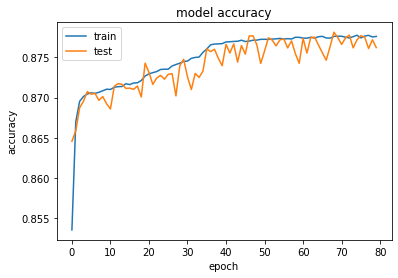

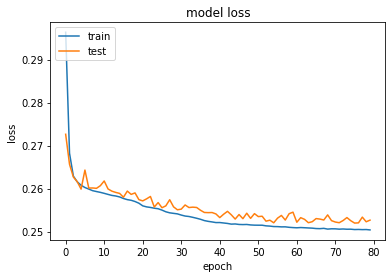

In [0]:
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

batch_size=50 
epochs=80

#Fitting the data to the training dataset
history = classifier.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          callbacks=[checkpoint])

# serialize model to JSON
model_json = classifier.to_json()
with open("/content/drive/My Drive/Colab Notebooks/dataset/lane200_20pct.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("/content/drive/My Drive/Colab Notebooks/dataset/lane200_20pct_wg.h5")
print("Saved model to disk")

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


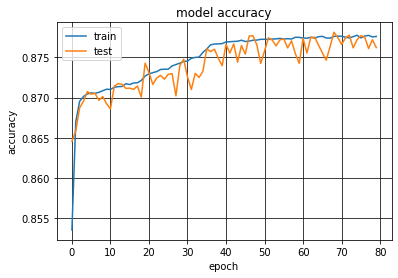

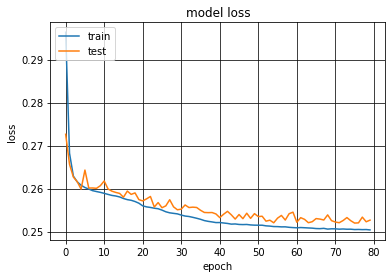

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(b=True, which='major', color='#111111', linestyle='-')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(b=True, which='major', color='#111111', linestyle='-')
plt.show()

In [0]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

1412241/1412241 [==============================] - 31s 22us/step


[0.25072433061568333, 0.8769997358322144]

In [0]:
print(X_test[0:3,:])
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)
print(y_pred[0:3,:])

[[-1.58781599  0.27651687 -1.04038479 -1.26735712 -1.31599418 -1.309349
  -1.22783027 -1.04843571 -1.31824657 -1.3346659  -1.31819608 -1.07417853
  -1.34504961 -1.36206212 -1.38917558 -1.28690865 -1.2868121  -1.34703671
  -1.36428989 -1.39863457 -1.04156007 -1.26798138 -1.26744213 -1.34884785
  -1.20887262 -1.20936475 -1.29002044 -1.32489391 -1.27115186]
 [ 0.34159929 -0.5550921   0.46717119  0.30522133  0.45141592  2.63812888
   1.41429807  1.26724037  1.40648385  2.68722777  0.96393045  0.31344129
   0.26278426  0.38150086  2.17138005  1.72793912  1.60840864  1.01961199
   2.78650422  0.98589927  0.4593283   0.28523718  0.61729916  1.91915783
   2.12959136  1.93592901  0.6037856   2.97580016  2.17971302]
 [ 1.30630694  0.00871059  0.15917588  0.43491852  0.53248978  0.10978561
   0.30525654  0.41924631  0.42164153  0.50391406  0.29078522  0.24575251
   0.4997282   0.39842866  0.31443956  0.51859341  0.29704395  0.19642983
   0.38521837  0.16246313  0.23244982  0.59937127  0.26827299 

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

T= sum(sum(cm))

cm=cm/T
print(cm)

acc = cm[0,0] + cm[1,1]
print(acc)


[[0.60849542 0.0703108 ]
 [0.05259148 0.26860231]]
0.877097725322253
